In [33]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

F=7 #Mateusz
L=8 #Saternus

## Excercise 1 -  Generated Quantities Block

In [34]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [35]:
samples1= gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)



INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


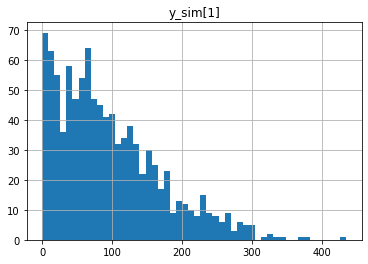

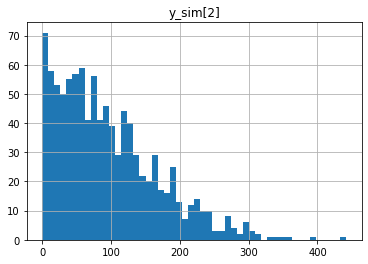

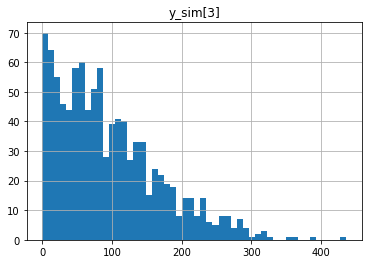

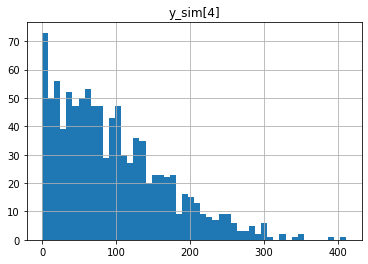

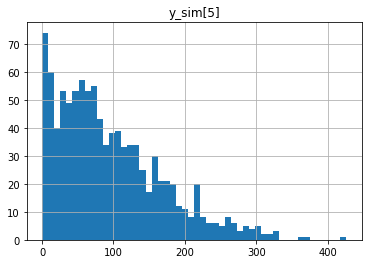

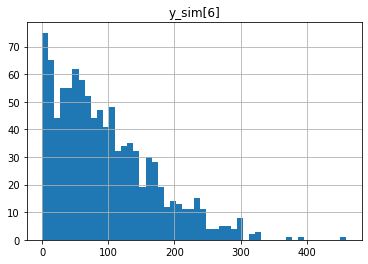

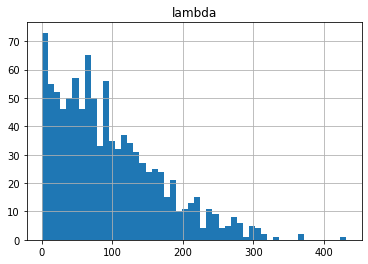

In [38]:
results1: pd.DataFrame = samples1.draws_pd();
for i in range(1, 7):
    results1.hist(f"y_sim[{i}]", bins=50);
results1.hist('lambda', bins=50);

## Excercise 2 - Constraints on the data 

In [19]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
#samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]}) was like this
# did not work because 'y' must be between [0,1]


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [20]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
#samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]}) <- was like this
# did not work because 'y' must be between [0,1]

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [21]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |████▎     | 00:01 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |████▊     | 00:01 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |█████▍    | 00:01 Iteration: 3600 / 7000 [ 51%]  (Sampling)


chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 4200 / 7000 [ 60%]  (Sampling)


chain 1 |██████▋   | 00:02 Iteration: 4500 / 7000 [ 64%]  (Sampling)





chain 1 |███████   | 00:02 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 5000 / 7000 [ 71%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 5200 / 7000 [ 74%]  (Sampling)


chain 1 |███████▉  | 00:02 Iteration: 5400 / 7000 [ 77%]  (Sampling)


chain 1 |███████


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab. 2/samples/code_4-20230712122119_1.csv, /home/Lab. 2/samples/code_4-20230712122119_2.csv, /home/Lab. 2/samples/code_4-20230712122119_3.csv, /home/Lab. 2/samples/code_4-20230712122119_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

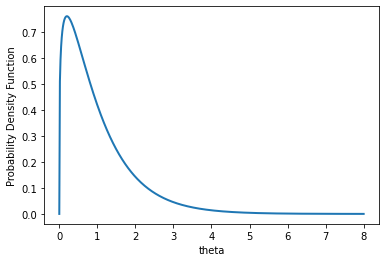

In [22]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [23]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |███▎      | 00:00 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |████▏     | 00:01 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▋     | 00:01 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 3800 / 7000 [ 54%]  (Sampling)


chain 1 |██████    | 00:01 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:01 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▋   | 00:02 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |██████▉   | 00:02 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████▏  | 00:02 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |███████▌  | 00:02 Iteration: 5100 / 7000 [ 72%]  (Sampling)


chain 1 |███████▊  


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab. 2/samples/code_5-20230712122123_1.csv, /home/Lab. 2/samples/code_5-20230712122123_2.csv, /home/Lab. 2/samples/code_5-20230712122123_3.csv, /home/Lab. 2/samples/code_5-20230712122123_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

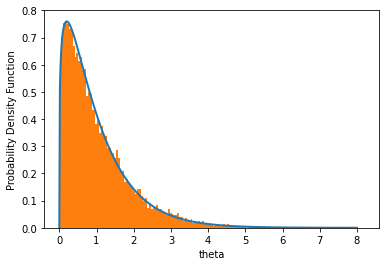

In [40]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
plt.hist(out_gamma2.draws_pd()['theta'], bins=160, density=True)


plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [41]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 7; # number of letters in the first name
L = 8; # number of letters in the last name
y0 = 3;# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
print(f"Sigma = {tunes.draws()[0][0][2]}")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



Sigma = 2.91168


## Excercise 5 - different methods of defining models


In [42]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 26012000;#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


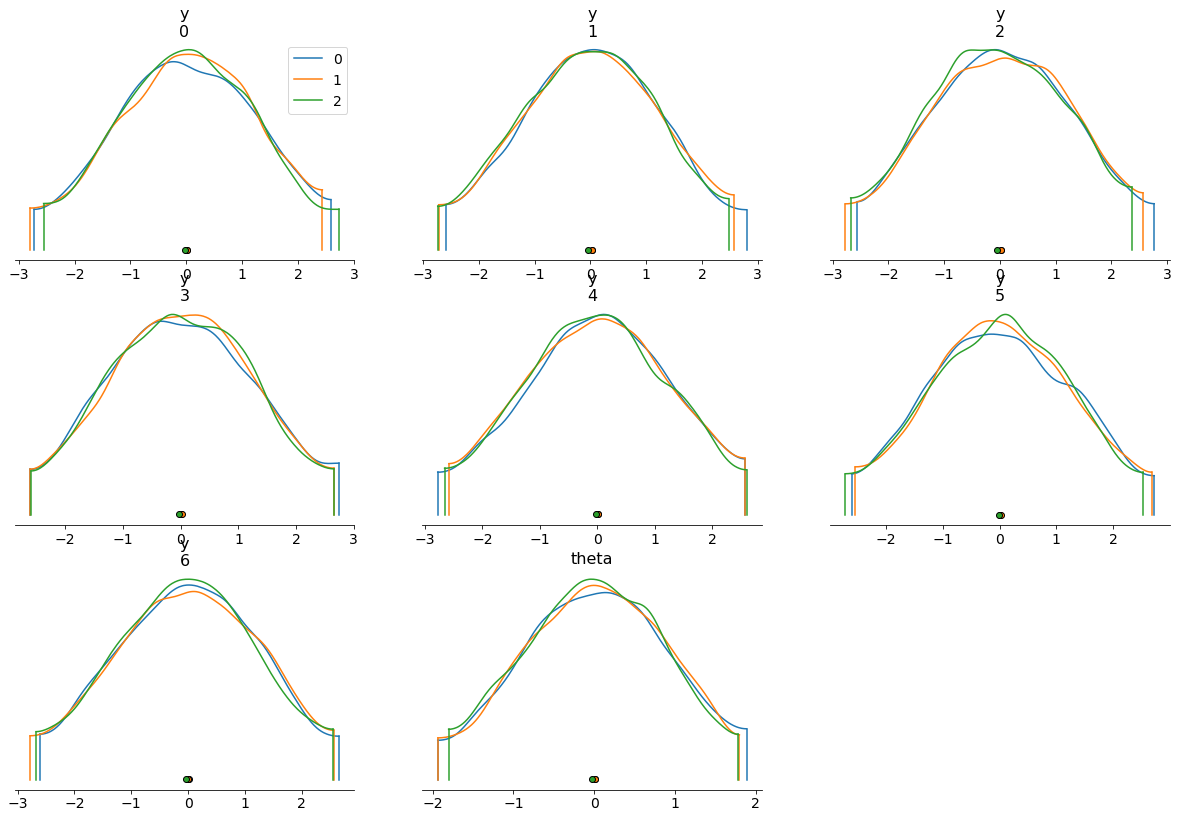

In [27]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [2] done processing


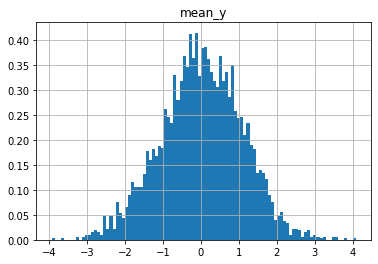

In [44]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
# investigate the output and plot histogram of mean_y variable
mean_of_y.draws_pd().hist('mean_y', bins=100, density=True);